# Haberman Cancer Survival EDA and prediction

## Objective: 
Our objective is to classify the persons who are survived after the surgery and who are dead after the surgery from the given data set.

### Real World Business Constraints:
* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.

### Dataset Description: 
The data set contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's
Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Attribute Information:
* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) 1 = the patient survived 5 years or longer, 2 = the patient died within 5 years

### Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supressing all warnings
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [3]:
# Importing dataset
df = pd.read_csv('haberman_survival.csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#### Analyzing Data

In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   nodes   305 non-null    int64
 3   status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
df.describe()

,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.357377,62.868852,4.032787,1.262295
std,10.678010,3.242783,7.200528,0.440605
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.000000,66.000000,4.000000,2.000000
max,78.000000,69.000000,52.000000,2.000000


In [6]:
print('Number of rows in dataset = ', df.shape[0])
print('Number of columns in dataset = ', df.shape[1])
print('Percentage of patients who survived for 5 years or longer = ', round((len(df.loc[(df['status']==1)])/df.shape[0])*100), '%' )
print('Percentage of patients who survived less than 5 years = ', round((100-(len(df.loc[(df['status']==1)])/df.shape[0])*100)), '%' )

Number of rows in dataset =  305
Number of columns in dataset =  4
Percentage of patients who survived for 5 years or longer =  74 %
Percentage of patients who survived less than 5 years =  26 %


In [7]:
df['nodes'].value_counts()

0     136
1      41
3      20
2      19
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
22      3
19      3
23      3
15      3
10      3
20      2
12      2
21      1
52      1
30      1
16      1
24      1
46      1
18      1
35      1
17      1
25      1
28      1
Name: nodes, dtype: int64

In [8]:
df['age'].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
49    10
65    10
55    10
38    10
41    10
42     9
45     9
61     9
59     8
63     8
56     7
58     7
62     7
48     7
46     7
44     7
70     7
34     7
51     6
67     6
39     6
37     6
60     6
66     5
64     5
69     4
72     4
30     3
40     3
31     2
68     2
36     2
35     2
33     2
73     2
74     2
71     1
75     1
76     1
77     1
78     1
Name: age, dtype: int64

In [9]:
df['year'].value_counts()

58    35
64    31
63    30
65    28
60    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

#### Obeservation:
* No null values are present in the data.
* All features are intger types.
* Dependent variable is present as integer type with vals 1 and 2.
* There is class imbalance in the data with 74 % belongs to class 1 and 26 belongs to class 2. 

## Exploratory Data Analysis

### 1. Univarate Analysis
Viz PDF, CDF, Boxplot, Voilin plots


### Feature - Age

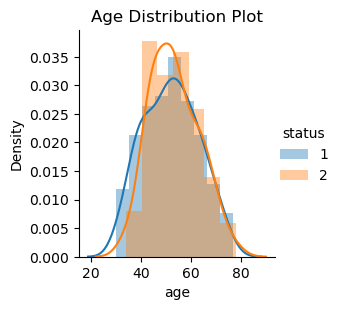

In [11]:
# Plotting distribution plot of Age of patients
sns.FacetGrid(df, hue="status").map(sns.distplot, "age").add_legend();
plt.title("Age Distribution Plot")
plt.show();

* There is not any significant separation between the ditribution of two classes. 
* For age less than 35, patient is more likely survive.

Let's also see how many patients have age less than 37 and what is their survival rate.

In [12]:
print('Number of patients with age less than 37:', len(df.loc[df['age']<=37]), 'patients')
print('Percentage of patients with age<=37 who survived for more than 5 years:',
          round((len(df.loc[(df['age']<=37) & (df['status']==1)])/len(df.loc[df['age']<=37]))*100),'%')

Number of patients with age less than 37: 24 patients
Percentage of patients with age<=37 who survived for more than 5 years: 92 %


In [13]:
# Creating two series based on Survival status of patients
df_1 = df.loc[df['status']==1]
df_2 = df.loc[df['status']==2]

[0.03111111 0.04       0.08888889 0.07555556 0.07555556 0.06666667
 0.09777778 0.14222222 0.08888889 0.07555556 0.07111111 0.05777778
 0.04444444 0.02666667 0.01777778]
[30.         33.13333333 36.26666667 39.4        42.53333333 45.66666667
 48.8        51.93333333 55.06666667 58.2        61.33333333 64.46666667
 67.6        70.73333333 73.86666667 77.        ]


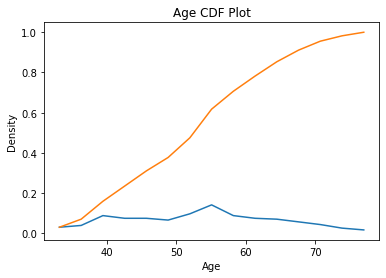

In [14]:
# Plotting cdf and pdf of Age feature
counts, bin_edges = np.histogram(df_1['age'], bins=15, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age CDF Plot")
plt.show();

* Most patients belong to age group 50-60 years.

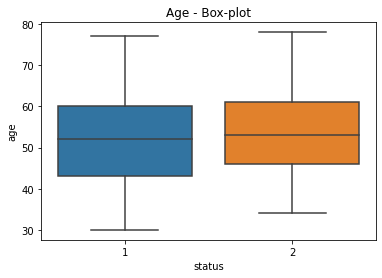

In [15]:
# Plotting box-plot for Age feature
sns.boxplot(x="status", y="age", data=df)
plt.title("Age - Box-plot")
plt.show()

* There is a clear difference at the bottom edge of the box plot which shows that patients of age 46 or lower has a better chance of survival than patients older than that.

### Feature - Year

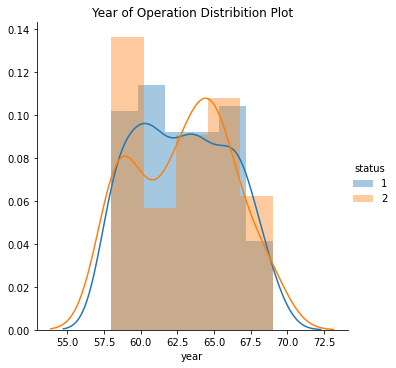

In [16]:
# Plotting distribution of Operation year of patients
sns.FacetGrid(df, hue="status", size=5).map(sns.distplot,"year").add_legend();
plt.title("Year of Operation Distribition Plot")
plt.show();

* Both the plots are on top of each other, no significant conclusion can be drawn.

[0.10666667 0.08       0.10666667 0.         0.10222222 0.07111111
 0.09777778 0.         0.10222222 0.06666667 0.09777778 0.
 0.09333333 0.04444444 0.03111111]
[58.         58.73333333 59.46666667 60.2        60.93333333 61.66666667
 62.4        63.13333333 63.86666667 64.6        65.33333333 66.06666667
 66.8        67.53333333 68.26666667 69.        ]


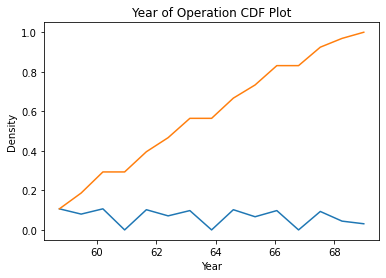

In [17]:
# Plotting CDF and PDF curve of year of operation feature
counts, bin_edges = np.histogram(df_1['year'], bins=15, density = True)

pdf = counts/sum(counts)
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf);
plt.xlabel("Year")
plt.ylabel("Density")
plt.title("Year of Operation CDF Plot")
plt.show();

* We are getting these spikes because year of operation is a discrete feature.
* Change in slope of cdf curve represent the change in nunmber of data points in those years.

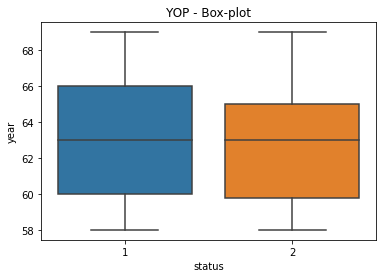

In [18]:
# Plotting box-plot for Year of operation feature
sns.boxplot(x="status", y="year", data=df)
plt.title("YOP - Box-plot")
plt.show()

* At the top edge of the box plot there is a clear separation, which shows that people opearted in 1965 and 1966, has greater chance of survival.

In [57]:
print('Number of patients who were opearted in year 1965+:', len(df.loc[df['year']>=65]), 'patients')
print('Percentage of patients who were opearted in year 1965+ and also survived for more than 5 years:',
          round((len(df.loc[(df['year']>=65) & (df['status']==1)])/len(df.loc[df['year']>=65]))*100),'%')

Number of patients who were opearted in year 1965+: 105 patients
Percentage of patients who were opearted in year 1965+ and also survived for more than 5 years: 71 %


### Feature - Axil nodes

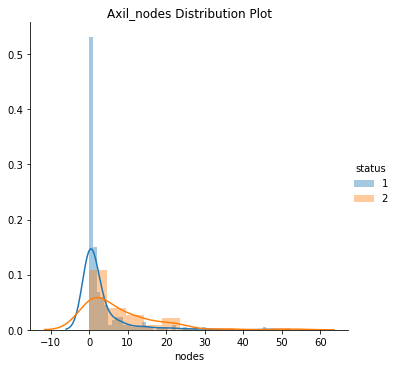

In [20]:
# Plotting pdf of anil_nodes features

sns.FacetGrid(df, hue='status', size=5).map(sns.distplot, 'nodes').add_legend();
plt.title('Axil_nodes Distribution Plot');
plt.show();

* For axil_nodes more than 4 patient is more likely to not survive.
* At axil_nodes = 1, we have the highest portion surviving patients.

[0.79111111 0.09333333 0.04444444 0.02666667 0.01333333 0.01333333
 0.00444444 0.00888889 0.         0.         0.         0.00444444]
[ 0.          3.83333333  7.66666667 11.5        15.33333333 19.16666667
 23.         26.83333333 30.66666667 34.5        38.33333333 42.16666667
 46.        ]


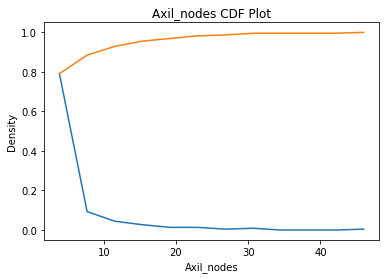

In [21]:
# Plotting CDF and PDF curve of Axil_nodes feature
counts, bin_edges = np.histogram(df_1['nodes'], bins=12, density = True)

pdf = counts/sum(counts)
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf);
plt.xlabel("Axil_nodes")
plt.ylabel("Density")
plt.title("Axil_nodes CDF Plot")
plt.show();

* We can see that 85% of the patients has axil_nodes values less than 7 and 90% has less than 10.

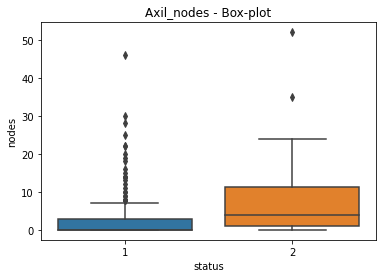

In [22]:
# Plotting box-plot for Axil_nodes feature
sns.boxplot(x="status", y="nodes", data=df)
plt.title("Axil_nodes - Box-plot")
plt.show()

* There are almost zero patients with axil_nodes 4-7 who survived for more than 5 years.
* Patients with more than 7 axil_nodes are highly unlikely to survive.


### 2. Bivariate Analysis
Pairplots

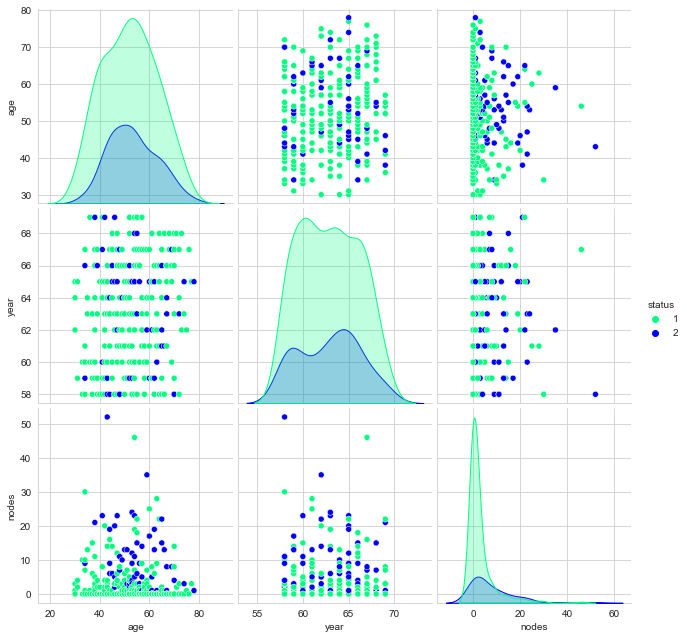

In [23]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="status", size = 3, palette='winter_r')
plt.show()

* Cannot identidy any significant observation from these pairplots other than what we have already seen in univariate analysis.
* We can see that the data is overlapping and not following any specific pattern in that.
* Hence, we should use non-linear models to classify the above data.

## Conclusion (EDA)

* All the features are iteger type and no null values are present in the data. 
* Our dependent feature is a binary with values 1 & 2 - where '1' represent patients who survived for more than 5 years after the surgery(positive class) and '2' represent patients who could not(negative class).
* Class imbalance is also present in the data with 74% patients belong to class '1'(positive) and 26% belongs to class '2'(negative).
* Patients whose age is less than 37 years is 92% likely to survive. We can also say that most of our patients belongs to age group 50-60 years. Furthermore, we also saw using box plot that people with less age are geenrally more likely to survive than people with more age. 
* Also, patients who were operated in year 1965 and after that, has a 71% higher chance of survival.
* Axil_nodes featue has a positive correation with survival status of patients, with node value as 1 showing the highest survival of patients. All the patients whose axil nodes values are between 4 and 7 could not survived for more than 5 years. While more than 7 are highly unlikely.


* We can see that the data is overlapping and not following any specific pattern and cannot be classified optimally using linear models. 

## Modelling data into an ML problem

* As we can see the data in pair plot is not linearly separable and also have a lot os overlapping, which implies that we should not use ML models like Logistic regression or SVM. 
* for k-NN, as our data is highly imbalanced, we will first oversample the minority class and then implement the model.
* Decision trees, Random forest and XGBoost models can be used, so we will try to implement these models directly, without over-sampling.

### Choosing the right evaluation metrics

As it is a binary classification problem,  our primary metric will be 'Accuracy' we will also draw a 'Confuion Matrix' and will try to determine 'Precision' and 'Recall' values as well.

In [24]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [25]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### Splitting the dataset into train and test:

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [27]:
X_train.head()

,age,year,nodes
242,62,66,0
113,48,66,0
263,65,64,0
179,54,62,0
68,43,64,3


We split the data into train and test data sets, preserving the ratio of class distribution in the original data set.

In [28]:
X_test.head()

,age,year,nodes
62,43,58,52
124,50,63,13
267,65,67,1
251,63,61,9
160,53,63,24


#### Using one-hot encoding on Year feature

In [29]:
# Converting year column into a Categorical variable
# data['Gender']=data['Gender'].astype('category')
# X_train['year'] = X_train['year'].astype('string')
# X_test['year'] = X_test['year'].astype('string')

In [30]:
# one-hot encoding of Year feature
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# train_year_oneHotEncoded = vectorizer.fit_transform(X_train['year'])
# test_year_oneHotEncoded = vectorizer.transform(X_test['year'])

In [31]:
# vectorizer.get_feature_names()

In [32]:
one_hot_encoded_train = pd.get_dummies(X_train, columns = ['year'])
print(one_hot_encoded_train.iloc[:5,:])

     age  nodes  year_58  year_59  year_60  year_61  year_62  year_63  \
242   62      0        0        0        0        0        0        0   
113   48      0        0        0        0        0        0        0   
263   65      0        0        0        0        0        0        0   
179   54      0        0        0        0        0        1        0   
68    43      3        0        0        0        0        0        0   

     year_64  year_65  year_66  year_67  year_68  year_69  
242        0        0        1        0        0        0  
113        0        0        1        0        0        0  
263        1        0        0        0        0        0  
179        0        0        0        0        0        0  
68         1        0        0        0        0        0  


In [33]:
one_hot_encoded_cv = pd.get_dummies(X_cv, columns = ['year'])
print(one_hot_encoded_cv.iloc[:5,:])

     age  nodes  year_58  year_59  year_60  year_61  year_62  year_63  \
109   48      7        0        0        0        0        0        0   
2     30      0        0        0        0        0        0        0   
5     33     10        1        0        0        0        0        0   
225   60      1        0        0        0        1        0        0   
70    43      2        0        0        0        0        0        1   

     year_64  year_65  year_66  year_67  year_68  year_69  
109        0        0        0        1        0        0  
2          0        1        0        0        0        0  
5          0        0        0        0        0        0  
225        0        0        0        0        0        0  
70         0        0        0        0        0        0  


In [34]:
one_hot_encoded_test = pd.get_dummies(X_test, columns = ['year'])
print(one_hot_encoded_test.iloc[:5,:])

     age  nodes  year_58  year_59  year_60  year_61  year_62  year_63  \
62    43     52        1        0        0        0        0        0   
124   50     13        0        0        0        0        0        1   
267   65      1        0        0        0        0        0        0   
251   63      9        0        0        0        1        0        0   
160   53     24        0        0        0        0        0        1   

     year_64  year_65  year_66  year_67  year_68  year_69  
62         0        0        0        0        0        0  
124        0        0        0        0        0        0  
267        0        0        0        1        0        0  
251        0        0        0        0        0        0  
160        0        0        0        0        0        0  


### Implementing k-NN model

In [35]:
# Standardizing the data first before implementing k-NN
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_cv_scaled = Scaler.transform(X_cv)
X_test_scaled = Scaler.transform(X_test)

In [36]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier

K = []
training = []
cv = []
scores = {}
alpha = [i for i in range(2,50,3)]
for k in alpha:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train_scaled, y_train)
  
    training_score = clf.score(X_train_scaled, y_train)
    cv_score = clf.score(X_cv_scaled, y_cv)
    K.append(k)
  
    training.append(training_score)
    cv.append(cv_score)
    scores[k] = [training_score, cv_score]

In [37]:
# Evaluating the model
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.8102564102564103, 0.7142857142857143]
5 : [0.7846153846153846, 0.7755102040816326]
8 : [0.7230769230769231, 0.7755102040816326]
11 : [0.7487179487179487, 0.7755102040816326]
14 : [0.7384615384615385, 0.8163265306122449]
17 : [0.7487179487179487, 0.7959183673469388]
20 : [0.7743589743589744, 0.7346938775510204]
23 : [0.7435897435897436, 0.8163265306122449]
26 : [0.7487179487179487, 0.7755102040816326]
29 : [0.7333333333333333, 0.7959183673469388]
32 : [0.7333333333333333, 0.7346938775510204]
35 : [0.7435897435897436, 0.7346938775510204]
38 : [0.7384615384615385, 0.7346938775510204]
41 : [0.7384615384615385, 0.7551020408163265]
44 : [0.7384615384615385, 0.7551020408163265]
47 : [0.7384615384615385, 0.7551020408163265]


#### Plotting cross validation graph to find the best hypyer parameter (k) value

Text(0.5, 1.0, 'Hyperparameter(k) vs Score')

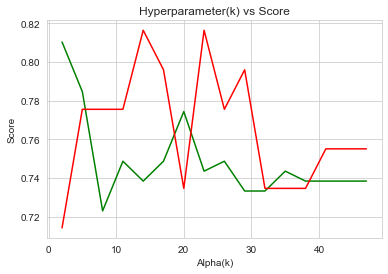

In [38]:
#creating the axis
fig, ax = plt.subplots()
#plotting the lines
ax.plot(alpha,training,color="g",label='line1' )
ax.plot(alpha,cv,color="r",label='line2')

plt.xlabel('Alpha(k)')
plt.ylabel('Score')
plt.title('Hyperparameter(k) vs Score')


* We can see that we are getting the maximum training and cv score values at around k = 23

In [39]:
best_k = 23
clf = KNeighborsClassifier(n_neighbors = best_k)
clf.fit(X_train_scaled, y_train)
      
print('For values of best k =',best_k, ". The training score is:",clf.score(X_train_scaled, y_train))
print('For values of best k =',best_k, ". The cv score is:",clf.score(X_cv_scaled, y_cv))
print('For values of best k =', best_k, ". The testing score is:",clf.score(X_test_scaled, y_test))

For values of best k = 23 . The training score is: 0.7435897435897436
For values of best k = 23 . The cv score is: 0.8163265306122449
For values of best k = 23 . The testing score is: 0.7540983606557377


#### Printing confusion matrix

Number of mis-classified points : 0.26229508196721313
Confusion matrix by number of values in each quadrant:


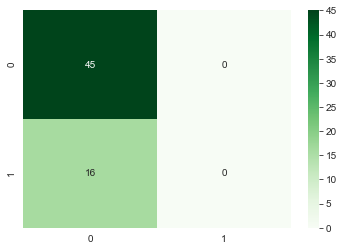

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf.predict(X_test)
print("Number of mis-classified points :", np.count_nonzero((y_pred- y_test))/y_test.shape[0])
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cmap='Greens')
print("Confusion matrix by number of values in each quadrant:")

Confusion matrix by percentage of values in each quadrant:


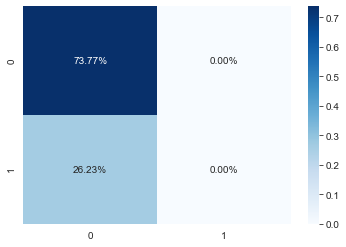

In [41]:
# Printing confusion matrix by percentage of values in each quadrant
sns.heatmap(cfm/np.sum(cfm), annot=True, 
fmt='.2%', cmap='Blues')
print("Confusion matrix by percentage of values in each quadrant:")

In [42]:
cfm.sum()

61

#### Accuracy and Recall score

In [43]:
print("Accuracy score:", (cfm[0][0]+cfm[1][1])/cfm.sum())
print("Recall value:", (cfm[0][0]/(cfm[0][0]+cfm[1][0])))

Accuracy score: 0.7377049180327869
Recall value: 0.7377049180327869


### Model Summary - K Nearest Neighbour
* Training score = 0.7846
* CV score = 0.8163
* Testing score = 0.7705
* Accuracy score = 0.7705
* Recall score = 0.7924

### Implementing Random Forest Model

In [46]:
from sklearn.ensemble import RandomForestClassifier

alpha = [5,10,20,30,40,50,60,75,100, 125]
max_depth = 5
training=[]
cv=[]
for i in alpha:
    print("for n_estimators =", i)
    clf = RandomForestClassifier(n_estimators=i, max_depth=5, random_state=42, n_jobs=-1)
    clf.fit(X_train, y_train)
        
    training.append(clf.score(X_train, y_train))
    cv.append(clf.score(X_cv, y_cv))
        
    print('Training score=', clf.score(X_train, y_train))
    print('CV score=', clf.score(X_cv, y_cv))

for n_estimators = 5
Training score= 0.8
CV score= 0.7959183673469388
for n_estimators = 10
Training score= 0.8153846153846154
CV score= 0.7551020408163265
for n_estimators = 20
Training score= 0.8307692307692308
CV score= 0.7959183673469388
for n_estimators = 30
Training score= 0.8307692307692308
CV score= 0.7755102040816326
for n_estimators = 40
Training score= 0.8307692307692308
CV score= 0.7755102040816326
for n_estimators = 50
Training score= 0.8256410256410256
CV score= 0.7959183673469388
for n_estimators = 60
Training score= 0.8256410256410256
CV score= 0.7755102040816326
for n_estimators = 75
Training score= 0.8358974358974359
CV score= 0.7755102040816326
for n_estimators = 100
Training score= 0.8307692307692308
CV score= 0.7959183673469388
for n_estimators = 125
Training score= 0.8358974358974359
CV score= 0.7959183673469388


In [47]:
print(training)
print(len(training))
print(cv)
print(len(cv))

[0.8, 0.8153846153846154, 0.8307692307692308, 0.8307692307692308, 0.8307692307692308, 0.8256410256410256, 0.8256410256410256, 0.8358974358974359, 0.8307692307692308, 0.8358974358974359]
10
[0.7959183673469388, 0.7551020408163265, 0.7959183673469388, 0.7755102040816326, 0.7755102040816326, 0.7959183673469388, 0.7755102040816326, 0.7755102040816326, 0.7959183673469388, 0.7959183673469388]
10


Text(0.5, 1.0, 'Hyperparameter(n_estimators) vs Score')

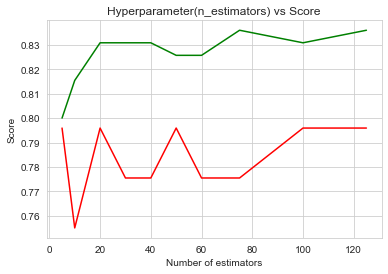

In [48]:
#creating the axis
fig, ax = plt.subplots()
#plotting the lines
ax.plot(alpha,training,color="g",label='line1' )
ax.plot(alpha,cv,color="r",label='line2')

plt.xlabel('Number of estimators')
plt.ylabel('Score')
plt.title('Hyperparameter(n_estimators) vs Score')

* We can see that we are getting the maximum training and cv score values at around estimators = 100.

In [49]:
best_estimators_value = 100
clf = RandomForestClassifier(n_estimators=best_estimators_value, max_depth=5)
clf.fit(X_train, y_train)
      
print('For values of best k =',best_estimators_value, ". The training score is:",clf.score(X_train, y_train))
print('For values of best k =',best_estimators_value, ". The cv score is:",clf.score(X_cv, y_cv))
print('For values of best k =', best_estimators_value, ". The testing score is:",clf.score(X_test, y_test))

For values of best k = 100 . The training score is: 0.8307692307692308
For values of best k = 100 . The cv score is: 0.7346938775510204
For values of best k = 100 . The testing score is: 0.7704918032786885


#### Printing confusion matrix

Number of mis-classified points : 0.22950819672131148
Confusion matrix by number of values in each quadrant:


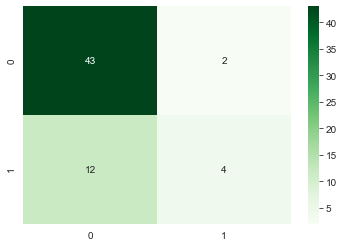

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf.predict(X_test)
print("Number of mis-classified points :", np.count_nonzero((y_pred- y_test))/y_test.shape[0])
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cmap='Greens')
print("Confusion matrix by number of values in each quadrant:")

Confusion matrix by percentage of values in each quadrant:


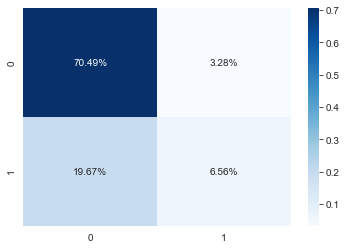

In [51]:
# Printing confusion matrix by percentage of values in each quadrant
sns.heatmap(cfm/np.sum(cfm), annot=True, 
fmt='.2%', cmap='Blues')
print("Confusion matrix by percentage of values in each quadrant:")

#### Accuracy and Recall score

In [52]:
print("Accuracy score:", (cfm[0][0]+cfm[1][1])/cfm.sum())
print("Recall value:", (cfm[0][0]/(cfm[0][0]+cfm[1][0])))

Accuracy score: 0.7704918032786885
Recall value: 0.7818181818181819


### Model Summary - K Nearest Neighbour
* Training score = 0.8718
* CV score = 0.7347
* Testing score = 0.75409
* Accuracy score = 0.75409
* Recall score = 0.78846